### Modelo de regresion logistica para la predicción de victorias, empates, y derrotas.
- Preprocesamiento: Convertimos result en binario (1 si gana, 0 si no gana).
- Selección de Características: Usamos variables relevantes (home_adv, estadísticas del equipo y del rival).
- Entrenamiento del Modelo: Usamos LogisticRegression de sklearn.
- Evaluación: Métricas como accuracy y classification_report.

#### 1. Carga de datos y preparación
- Cargamos el dataset y seleccionamos las características relevantes.
- Eliminamos las columnas `goals_team`, `goals_rival` y `result` (ya que `result` será la variable objetivo).
- Separamos los datos en entrenamiento y validación (los últimos 15 partidos serán usados para evaluar el modelo).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Cargar los datos
file_path = "../../datasets/datasets_equipos/real_madrid.csv"
df = pd.read_csv(file_path)
df


,season,date,team,rival_team,home_adv,last_season_team,last_season_rival,pct_wins,avg_goals_scored,avg_goals_received,...,avg_goals_received_vs_rival,goal_difference_vs_rival,goals_team,goals_rival,result,AvgWin,AvgLoss,AvgDraw,AvgAHWin,AvgAHLoss
0,2003-04,2003-08-30,Real Madrid,Betis,1,21,21,0.00,0.00,0.00,...,0.0,0.0,2,1,1,1.38,7.18,4.00,1.94,1.91
1,2003-04,2003-09-02,Real Madrid,Villarreal,0,21,21,1.00,2.00,1.00,...,0.0,0.0,1,1,0,1.80,3.99,3.28,1.96,1.88
2,2003-04,2003-09-13,Real Madrid,Valladolid,1,21,21,0.50,1.50,1.00,...,0.0,0.0,7,2,1,1.29,9.10,4.39,1.82,2.02
3,2003-04,2003-09-21,Real Madrid,Malaga,0,21,21,0.67,3.33,1.33,...,0.0,0.0,3,1,1,1.62,4.90,3.40,1.92,1.93
4,2003-04,2003-09-27,Real Madrid,Valencia,0,21,21,0.75,3.25,1.25,...,0.0,0.0,0,2,-1,2.27,2.79,3.13,1.95,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2023-24,2024-05-04,Real Madrid,Cadiz,1,2,16,0.80,2.30,0.70,...,2.0,6.0,3,0,1,7.09,6.00,2.13,2.02,1.88
794,2023-24,2024-05-11,Real Madrid,Granada,0,2,21,0.80,2.20,0.70,...,2.0,11.0,4,0,1,3.96,2.52,5.59,1.86,1.99
795,2023-24,2024-05-14,Real Madrid,Alaves,1,2,21,0.90,2.50,0.60,...,4.0,9.0,5,0,1,11.32,8.03,2.46,2.08,1.84
796,2023-24,2024-05-19,Real Madrid,Villarreal,0,2,5,0.90,2.90,0.60,...,6.0,1.0,4,4,0,3.61,2.34,3.35,1.84,2.02


In [18]:
# Eliminar columnas irrelevantes
df = df.drop(columns=["season", "date", "team"])

# Codificar la columna 'rival_team'
label_encoder = LabelEncoder()
df["rival_team"] = label_encoder.fit_transform(df["rival_team"])

#### 3. Preparación de datos para el modelo
- Eliminamos las columnas `goals_team`, `goals_rival` y `result` (esta última será nuestra variable objetivo).
- Convertimos `rival_team` en valores numéricos usando **Label Encoding**.
- Separamos los datos en **X (variables predictoras)** e **y (variable objetivo)**.
- Dividimos los datos en entrenamiento y validación:
  - **Entrenamiento:** Todos los partidos excepto los últimos 15.
  - **Validación:** Últimos 15 partidos.
- Escalamos los datos usando `StandardScaler` para mejorar la estabilidad del modelo.

In [ ]:
# Codificar la columna 'rival_team'
label_encoder = LabelEncoder()
df["rival_team"] = label_encoder.fit_transform(df["rival_team"])

# Separar variables predictoras y variable objetivo
X = df.drop(columns=["goals_team", "goals_rival", "result"])
y = df["result"]  # -1 (derrota), 0 (empate), 1 (victoria)

# Dividir en conjunto de entrenamiento y validación
X_train, X_val = X.iloc[:-15], X.iloc[-15:]
y_train, y_val = y.iloc[:-15], y.iloc[-15:]

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### 4. Entrenamiento del modelo
- Utilizamos **Random Forest Classifier**, que maneja bien datos tabulares.
- Entrenamos el modelo con los datos de entrenamiento.

In [ ]:
# Definir y entrenar el modelo de Regresión Logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

c:\Users\anaig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

#### 5. Evaluación del modelo
- **Métricas a evaluar:**
  - **Precisión global** (`accuracy_score`).
  - **Reporte de clasificación** (`classification_report`).
  - **Matriz de confusión** para visualizar los errores del modelo.


Reporte de clasificación:
               precision    recall  f1-score   support

Derrota (-1)       0.00      0.00      0.00         0
  Empate (0)       1.00      0.25      0.40         4
Victoria (1)       0.79      1.00      0.88        11

    accuracy                           0.80        15
   macro avg       0.60      0.42      0.43        15
weighted avg       0.84      0.80      0.75        15

Accuracy del modelo: 0.8000
Clases presentes en y_val: {0, 1}


c:\Users\anaig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anaig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anaig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

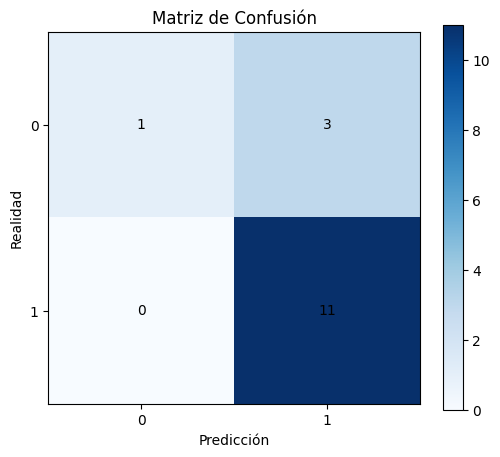

In [ ]:
# Predicciones en el conjunto de validación
y_pred = model.predict(X_val_scaled)

# Evaluación del modelo
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, labels=[-1, 0, 1], target_names=["Derrota (-1)", "Empate (0)", "Victoria (1)"])
print("\nReporte de clasificación:\n", report)

# Mostrar resultados
print(f"Accuracy del modelo: {accuracy:.4f}")

# Verificar las clases presentes en la validación
print("Clases presentes en y_val:", set(y_val))

# Obtener las clases presentes realmente en la validación
clases_presentes = sorted(set(y_val))  # Clases reales en la validación

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred, labels=clases_presentes)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(clases_presentes)), [f"{c}" for c in clases_presentes])
plt.yticks(range(len(clases_presentes)), [f"{c}" for c in clases_presentes])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")

# Mostrar valores dentro de la matriz
for i in range(len(clases_presentes)):
    for j in range(len(clases_presentes)):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

plt.show()


#### Enfoque secuencial acumulativo
- En lugar de dividir en un bloque fijo de partidos para validación, predeciremos un partido a la vez, actualizando los datos después de cada predicción.
- El modelo se entrenará con todos los partidos previos a cada predicción.
- Ventaja: La predicción del partido N+1 incluirá los datos del partido N, simulando cómo se usaría el modelo en tiempo real.

#### Algoritmo 
1. Usamos la última temporada completa para validación.
2. Para cada partido de esa temporada:
    - Entrenamos el modelo con todos los partidos anteriores.
    - Predecimos el resultado del siguiente partido.
    - Guardamos la predicción y actualizamos los datos disponibles.
3. Al final, evaluamos el desempeño global del modelo.

In [ ]:
# Número de partidos a usar como validación (última temporada completa)
n_validacion = 38  # 38 partidos en una temporada de LaLiga

# Separar los datos en entrenamiento inicial y validación progresiva
X_train_init = X.iloc[: -n_validacion]  # Todos los partidos excepto la última temporada
y_train_init = y.iloc[: -n_validacion]  # Etiquetas de entrenamiento inicial
X_val_seq = X.iloc[-n_validacion:]  # Última temporada completa para validación progresiva
y_val_seq = y.iloc[-n_validacion:]

# Inicializar listas para almacenar predicciones y resultados reales
y_pred_seq = []
y_real_seq = []

# Escalar datos inicialmente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_init)

In [30]:
# Iterar sobre los partidos de validación de manera secuencial
for i in range(n_validacion):
    # Entrenar el modelo con todos los partidos anteriores
    # Definir y entrenar el modelo de Regresión Logística
    model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train_init)

    # Obtener el partido a predecir
    X_next = X_val_seq.iloc[i:i+1]  # Tomamos solo el siguiente partido
    y_next = y_val_seq.iloc[i]  # Resultado real del partido

    # Escalar con los mismos parámetros del entrenamiento
    X_next_scaled = scaler.transform(X_next)

    # Predecir el partido
    y_pred_next = model.predict(X_next_scaled)[0]

    # Guardar la predicción y el resultado real
    y_pred_seq.append(y_pred_next)
    y_real_seq.append(y_next)

    # Agregar el partido actual al conjunto de entrenamiento para la siguiente iteración
    X_train_init = pd.concat([X_train_init, X_next])
    y_train_init = pd.concat([y_train_init, pd.Series([y_next])])

    # Volver a escalar los datos con la nueva información incluida
    X_train_scaled = scaler.fit_transform(X_train_init)

Accuracy del modelo en validación secuencial: 0.7237

Reporte de clasificación:
               precision    recall  f1-score   support

Derrota (-1)       0.00      0.00      0.00         2
  Empate (0)       0.33      0.06      0.11        16
Victoria (1)       0.76      0.93      0.84        58

    accuracy                           0.72        76
   macro avg       0.36      0.33      0.31        76
weighted avg       0.65      0.72      0.66        76



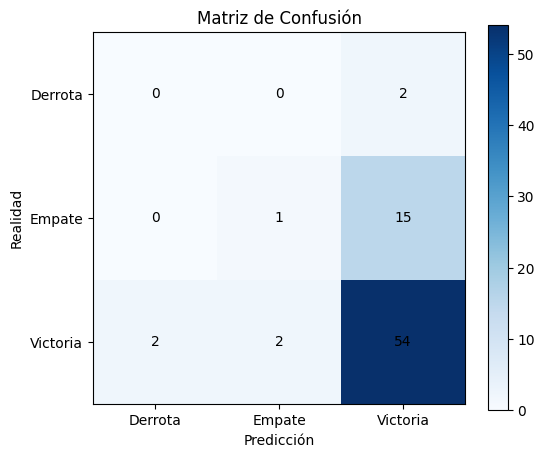

In [31]:
# Evaluación del desempeño global
accuracy = accuracy_score(y_real_seq, y_pred_seq)
report = classification_report(y_real_seq, y_pred_seq, labels=[-1, 0, 1], target_names=["Derrota (-1)", "Empate (0)", "Victoria (1)"])

print(f"Accuracy del modelo en validación secuencial: {accuracy:.4f}")
print("\nReporte de clasificación:\n", report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_real_seq, y_pred_seq, labels=[-1, 0, 1])

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1, 2], ["Derrota", "Empate", "Victoria"])
plt.yticks([0, 1, 2], ["Derrota", "Empate", "Victoria"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")

# Mostrar los valores dentro de la matriz
for i in range(3):
    for j in range(3):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

plt.show()

#### Conclusiones del Modelo

- **Precisión global:** 72.37% -> Buen desempeño en general.
- **Predicción de victorias:** Alto rendimiento (76% precisión, 93% recall).
- **Predicción de empates y derrotas:** Deficiente, especialmente en derrotas (0% recall).
- **Desbalance de clases:** El Real Madrid tiene **muchas más victorias** que empates o derrotas, lo que hace que el modelo **favorezca las victorias**.
- **Impacto del desbalance:** El modelo casi **ignora las derrotas** y tiene dificultades para clasificar empates.
- **Próximo paso:** Probar el mismo método con los datos de **Athletic Bilbao (`ath_bilbao.csv`)**, un equipo con distribución de resultados más equilibrada.
